<h3>Problem Statement:</h3>

Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

<b>Solution:</b>
    
Here is the code to load the data:

In [0]:
#import corresponding libraries
import numpy as np  #NumPy library is used for scientific computing with Python
import pandas as pd #Pandas is used for high-performance, easy-to-use data structures and data analysis tools for the Python
import scipy.stats as stats #library helps in statitical calculations
import matplotlib.pyplot as plt #library helps in ploting graph
import sklearn #helps in Machine Learning in Python.
from sklearn.datasets import load_boston  #loading in-built boston data from sklearn.datasets
#plot compatibity with jupyter notebook
%matplotlib inline 

In [0]:
#load boston housing data available in scipy into a dataset boston
boston = load_boston()

In [3]:
#Printing the boston variable as a dictionary and its key values 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(boston.DESCR) #describing boston data

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston.feature_names # checking values for 'feature_names'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.target # checking values for 'target' -> price values

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

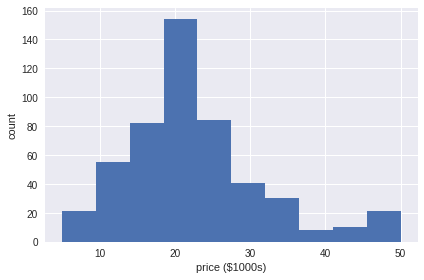

In [7]:
#using instance of matplotlib.pyplot class to plot the graph
plt.figure(figsize=(6, 4)) #defining size of the graph
plt.hist(boston.target) #uing histogram method to see the graph as histogram
plt.xlabel('price ($1000s)') #defining X-axis lable
plt.ylabel('count') #defining Y-axis lable
plt.tight_layout() #automatically adjusts subplot params so that the subplot(s) fits in to the figure area.

In [8]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
temp_boston = pd.DataFrame(boston.data,columns=boston.feature_names) #creating temporary dataframe from "feature_names" and "data"
temp_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<b>Adding the target / dependent variable to the dataframe temp_boston</b>

In [0]:
temp_boston['Price'] = boston.target #Adding target values to the data as Price column

<b>Boston Housing Data Summary Statstics</b>

In [11]:
temp_boston.describe()  #It shows current dataset with added column "Price"

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2>Exploaratory Data Analysis</h2>

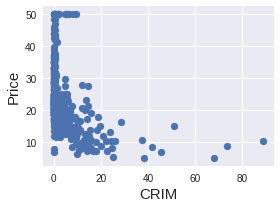

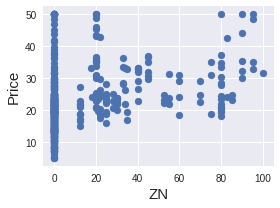

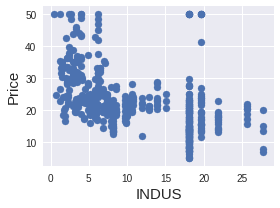

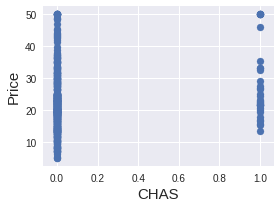

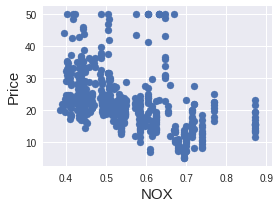

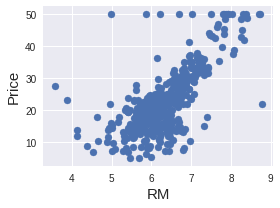

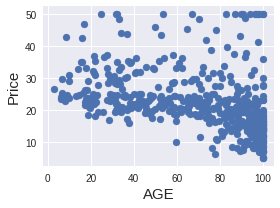

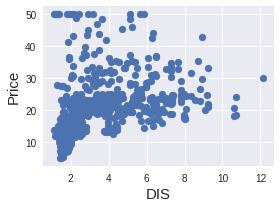

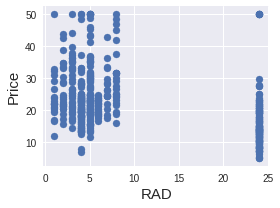

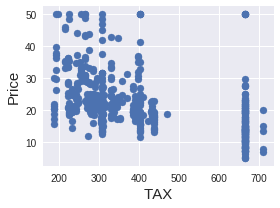

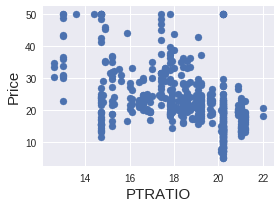

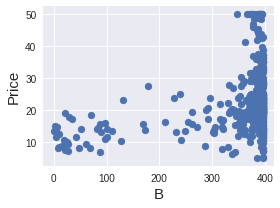

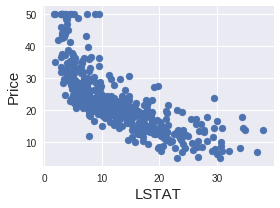

In [12]:
# Pirnt the scatter plot for each feature with respect to price
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3)) #defining figure size
    plt.scatter(boston.data[:, index], boston.target) #plotng a scatter plot
    plt.ylabel('Price', size=15) #definig y-axis lable
    plt.xlabel(feature_name, size=15) #defing x-axis lable
    plt.tight_layout()

<h2>Data Cleaning </h2>

In [13]:
temp_boston.isnull().values.any() #Check for any NA’s in the dataframe.

False

<h2>Train, Test &amp; Split</h2>

Split the dataset into two: target value and predictor values.

Let’s call the target value Y and predictor values X.

Thus, 
Y = Boston Housing Price , X = All other features

In [14]:
X = temp_boston.drop('Price',axis=1) #All features except Price ( predictor values )
Y = temp_boston.Price #Boston housing price ( target value )
print("X Shape : ",X.shape)
print("Y Shape : ",Y.shape)

X Shape :  (506, 13)
Y Shape :  (506,)


<h2>Train and Test Data</h2>

In [15]:
#importing inbuilt train and test data sets
from sklearn.model_selection import train_test_split 

#spliting 66.66% for train data and 33.33% for test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

#Printing shape of train and test data sets
print("X_train Shape : ",X_train.shape) #training data shape (predictor values)
print("X_test Shape : ",X_test.shape) #test data shape (predictor values)
print("Y_train Shape : ",Y_train.shape)  #training data shape (target values)
print("Y_test.shape : ",Y_test.shape) #test data shape (target values)

X_train Shape :  (339, 13)
X_test Shape :  (167, 13)
Y_train Shape :  (339,)
Y_test.shape :  (167,)


<h2>Creating and Training the Model</h2>
<b>Using Linear Regression Model</b>

In [16]:
from sklearn.linear_model import LinearRegression #importing linerregression library
lm = LinearRegression() #creating an instance of LinearRegression
lm.fit(X_train, Y_train) #fitting the created instance of the LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h2>Predicting Price using Test Data</h2>

In [0]:
Y_pred = lm.predict(X_test) #Calculating the prediction values "price" based on the test data 

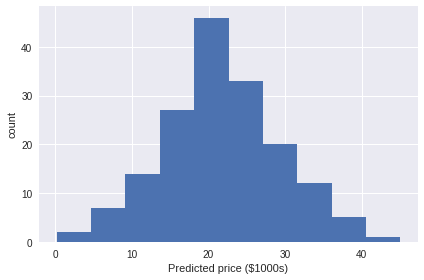

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(Y_pred)
plt.xlabel('Predicted price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [19]:
# print coefficients (Slope) beta0
print(boston.feature_names,"\n", lm.intercept_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 40.882972925185285


In [20]:
# print coefficients (Slope) beta1
print(boston.feature_names,"\n", lm.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 [-1.17788072e-01  4.75879109e-02  3.65663839e-03  2.51907388e+00
 -1.66382902e+01  3.65510558e+00 -1.12696330e-02 -1.58798192e+00
  2.51678785e-01 -1.08579935e-02 -1.04937239e+00  6.32451739e-03
 -5.21213815e-01]


<b>How do we interpret the coefficients?</b>

Holding all other variables fixed, considering an area where there is more crime rate (CRIM) the predicted price of the house decrease by 1177.88 $.

Being an urban area with good pupil-teacher ratio by town is associated with an average increase in price of houses by $6324.51

Text(0.5,1,'Prices vs Predicted prices')

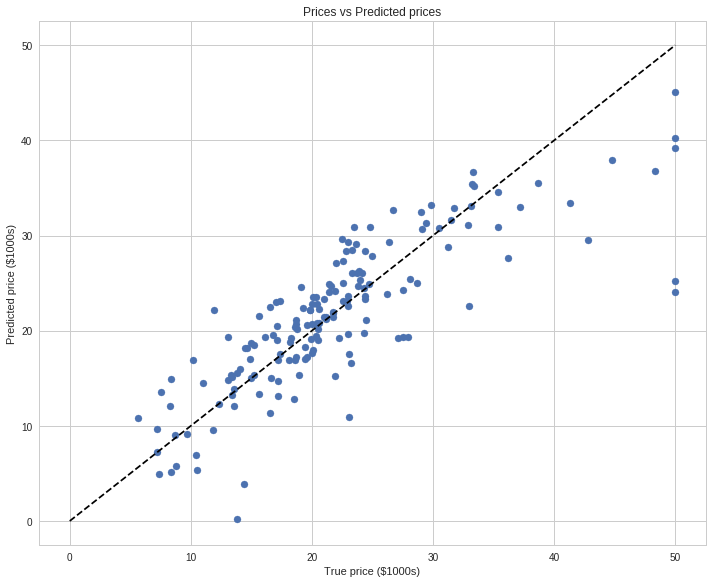

In [21]:
#To visualize the differences between actual prices and predicted values, creating a scatter plot.

#importing visualization tools for making quick inferences about relationships between variables

import seaborn as sns 
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

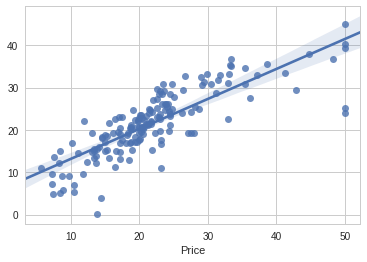

In [22]:
sns.regplot(Y_test, Y_pred, data=temp_boston, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

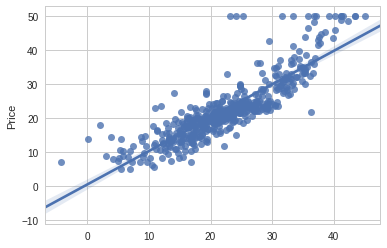

In [23]:
sns.regplot(x=lm.predict(X), y=temp_boston['Price'], data=temp_boston, fit_reg=True) #Plot predicted and actual Price values.

<h3>Evaluating Model:</h3>

<br>
<b>Mean Squared Error (MSE)</b>

In [24]:
from sklearn.metrics import mean_squared_error # Importing mean_squared_error library to calculate MSE
mse=mean_squared_error(Y_pred,Y_test)
print("Error Rate of the Regression Model, MSE = ",mse)

Error Rate of the Regression Model, MSE =  26.551004782161346


In [25]:
temp_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

<b>Root Mean Square Error (RMSE)</b>

In [26]:
rmse = mse ** 0.5 #Square root of mse (Mean Squared Error)
print(rmse)
print("The Root Mean Square Error (RMSE) for the Model is "+ str(rmse) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

5.152766711404791
The Root Mean Square Error (RMSE) for the Model is 5.152766711404791 and the Results can be further improved using feature extraction and rebuilding, training the model.


**Confidence Interval associated with the model( CI )**

In [27]:
import statsmodels.formula.api as smf #importing statistics formula
lm = smf.ols(formula='Price ~ CRIM + ZN +INDUS +CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO', data=temp_boston).fit()
lm.conf_int()

,0,1
Intercept,2.223001,19.379470
CRIM,-0.245341,-0.099962
ZN,0.010431,0.072634
INDUS,-0.274632,-0.007321
CHAS,1.429776,5.325840
RM,5.600659,7.184816
AGE,-0.094473,-0.040839
DIS,-1.691307,-0.822634
RAD,0.044403,0.340767
TAX,-0.022389,-0.005372


 **coefficient of determination**

In [28]:
print("Coefficient of Determmination = ",lm.rsquared)


Coefficient of Determmination =  0.6516432066977669


In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     92.60
Date:                Tue, 14 Aug 2018   Prob (F-statistic):          1.33e-106
Time:                        17:29:01   Log-Likelihood:                -1573.4
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     495   BIC:                             3215.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8012      4.366      2.474      0.014       2.223      19.379
CRIM          -0.1727      0.037     -4.667      0.000      -0.245      -0.100
ZN             0.0415      0.016      2.624      0.009       0.010       0.073
INDUS         -0.1410      0.068     -2.072      0.039      -0.275      -0.007
CHAS           3.3778      0.991      3.407      0.001       1.430       5.326
RM             6.3927      0.403     15.857      0.000       5.601       7.185
AGE           -0.0677      0.014     -4.957      0.000      -0.094      -0.041
DIS           -1.2570      0.221     -5.686      0.000      -1.691      -0.823
RAD            0.1926      0.075      2.554      0.011       0.044       0.341
TAX           -0.0139      0.004     -3.205      0.001      -0.022      -0.005
PTRATIO       -0.7435      0.142     -5.220      0.000      -1.023      -0.464
==============================================================================
Omnibus:                      271.410   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2861.504
Skew:                           2.111   Prob(JB):                         0.00
Kurtosis:                      13.858   Cond. No.                     8.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Warnings

1.   Standard Errors assume that the covariance matrix of the errors is correctly specified.
2.   The condition number is large, 1.14e+04.

This might indicate that there are strong multicollinearity or other numerical problems


